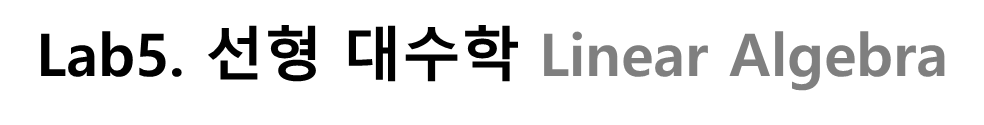

# 벡터
  * 선형 대수는 벡터 공간을 다루는 수학의 한 분야입니다.
  * 벡터는 유한 차원 공간에 존재하는 점들이며, 각각은 크기와 양을 가집니다.
  * 벡터를 가장 간단하게 표현하는 방법은 숫자로 구성된 리스트로 표현하는 것입니다.
  * 파이썬 리스트는 벡터가 아니므로 벡터 연산을 해주는 기본적인 도구가 없습니다.

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## 1. 벡터 덧셈

In [2]:
import re, math, random # regexes, math functions, random numbers
import matplotlib.pyplot as plt # pyplot
from collections import defaultdict, Counter
from functools import partial, reduce # For python3, "reduce" function is added

import numpy as np

def vector_add(v, w):
    """adds two vectors componentwise"""
    return [v_i + w_i for v_i, w_i in zip(v,w)]

v = [x for x in range(1, 11, 2)]
v
w = [y for y in range(11, 21, 2)]
w

vector_add(v, w)

[1, 3, 5, 7, 9]

[11, 13, 15, 17, 19]

[12, 16, 20, 24, 28]

In [3]:
# Numpy version
np.array(v) + np.array(w)

array([12, 16, 20, 24, 28])

## 2. 파이썬 산술 연산 vs. 넘파이 산술 연산

### Numpy(“넘파이”) Library
  * 행렬이나 일반적으로 대규모 다차원 배열을 쉽게 처리 할 수 있도록 지원하는 파이썬의 라이브러리 입니다
  * NumPy는 데이터 구조 외에도 수치 계산을 위해 효율적으로 구현된 기능을 제공합니다
  * 성능도 좋고 다양한 연산이 이미 구현되어 있습니다

In [4]:
# 벡터 덧셈의 속도를 비교, 파이썬 산술 연산 vs. 넘파이 산술 연산
%timeit vector_add(v, w)
%timeit np.array(v) + np.array(w)

649 ns ± 17.6 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)
2.87 µs ± 70.8 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## 3. 벡터 뺄셈

In [5]:
def vector_subtract(v, w):
    """subtracts two vectors componentwise"""
    return [v_i - w_i for v_i, w_i in zip(v,w)]

v
w
vector_subtract(v, w)

[1, 3, 5, 7, 9]

[11, 13, 15, 17, 19]

[-10, -10, -10, -10, -10]

In [6]:
# Numpy version
np.array(v) - np.array(w)

array([-10, -10, -10, -10, -10])

## 4. 벡터 리스트 덧셈

In [7]:
# cf) reduce
def add(x, y):
    return x + y
reduced1 = reduce(add, [1, 2, 3, 4, 5])
reduced1

reduced2 = reduce(lambda x, y: x + y, [1, 2, 3, 4, 5])
reduced2

15

15

In [8]:
# cf) * list
list = [1, 2, 3, 4, 5]
print(*list)
print(1, 2, 3, 4, 5)

1 2 3 4 5
1 2 3 4 5


In [9]:
v = [x for x in range(1, 11, 2)]
w = [y for y in range(11, 21, 2)]

# Version1
def vector_sum(vectors):
    return reduce(vector_add, vectors)

v
w
vectors = [v, w, v, w, v, w]
vector_sum(vectors)

# Version2
def vector_sum_modified(vectors):
    return [sum(value) for value in zip(*vectors)]

vectors = [v,w,v,w,v,w]
vector_sum_modified(vectors)

[1, 3, 5, 7, 9]

[11, 13, 15, 17, 19]

[36, 48, 60, 72, 84]

[36, 48, 60, 72, 84]

In [10]:
# Numpy operation
np.sum([v,w,v,w,v,w], axis=0) 
# axis=0 는 row [v,w,v,w,v,w]를 하나의 matrix로 생각했을 때, column별로 sum operation을 하라는 의미
# axis=1 는 row [v,w,v,w,v,w]를 하나의 matrix로 생각했을 때, row별로 sum operation을 하라는 의미

array([36, 48, 60, 72, 84])

## 5. 벡터 스칼라 곱

In [11]:
def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

scalar = 3
v
scalar_multiply(scalar, v)

[1, 3, 5, 7, 9]

[3, 9, 15, 21, 27]

In [12]:
# Numpy version: numpy는 배열의 크기가 다르더라도 기본적인 vector 연산이 가능하도록 지원. 이를 broadcasting이라고 함
scalar * np.array(v)

array([ 3,  9, 15, 21, 27])

## 6. 벡터 리스트 평균

In [13]:
def vector_mean(vectors):
    """compute the vector whose i-th element is the mean of the
    i-th elements of the input vectors"""
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

v = [1,2,3,4]
w = [-4,-3,-2,-1]

vector_mean([v,v,v,v])

[1.0, 2.0, 3.0, 4.0]

In [14]:
# Numpy version
np.mean([v,v,v,v], axis=0)
# axis=0 는 row [v,w,v,w,v,w]를 하나의 matrix로 생각했을 때, column별로 mean operation을 하라는 의미
# axis=1 는 row [v,w,v,w,v,w]를 하나의 matrix로 생각했을 때, row별로 mean operation을 하라는 의미

array([1., 2., 3., 4.])

## 7. 벡터의 내적

In [15]:
def dot(v, w):
    """v_1 * w_1 + ... + v_n * w_n"""
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

v
w
dot(v, w)

[1, 2, 3, 4]

[-4, -3, -2, -1]

-20

In [16]:
# Numpy version
np.dot(v,w)

-20

## 8. 벡터의 길이

In [17]:
# cf) 벡터 성분 제곱 값의 합
def sum_of_squares(v):
    """v_1 * v_1 + ... + v_n * v_n"""
    return dot(v, v)

v
sum_of_squares(v) # v * v = [1,4,9,16]

[1, 2, 3, 4]

30

In [18]:
# Magnitude (or length)
def magnitude(v):
    return math.sqrt(sum_of_squares(v))

magnitude(v)

5.477225575051661

In [19]:
# Numpy version
np.linalg.norm(v)

5.477225575051661

## 9. 두 벡터 사이의 거리

In [20]:
# cf) square
def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

v
w
squared_distance(v,w) 

[1, 2, 3, 4]

[-4, -3, -2, -1]

100

In [21]:
def distance(v, w):
   return math.sqrt(squared_distance(v, w))

distance(v,w)

10.0

In [22]:
# Numpy version
np.linalg.norm(np.subtract(v,w)) # or np.sqrt(np.sum(np.subtract(v,w)**2))

10.0

## 10. 벡터 점곱 그래프

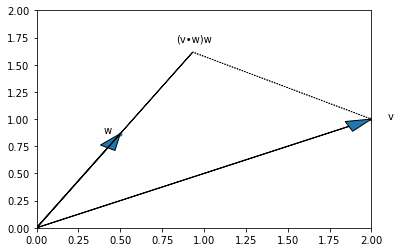

In [23]:
def make_graph_dot_product_as_vector_projection(plt):
    v = [2, 1]
    w = [math.sqrt(.25), math.sqrt(.75)]
    c = dot(v, w)
    vonw = scalar_multiply(c, w)
    o = [0,0]

    plt.arrow(0, 0, v[0], v[1], 
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("v", v, xytext=[v[0] + 0.1, v[1]])
    plt.arrow(0 ,0, w[0], w[1], 
              width=0.002, head_width=.1, length_includes_head=True)
    plt.annotate("w", w, xytext=[w[0] - 0.1, w[1]])
    plt.arrow(0, 0, vonw[0], vonw[1], length_includes_head=True)
    plt.annotate(u"(v•w)w", vonw, xytext=[vonw[0] - 0.1, vonw[1] + 0.1])
    plt.arrow(v[0], v[1], vonw[0] - v[0], vonw[1] - v[1], 
              linestyle='dotted', length_includes_head=True)
    plt.scatter(*zip(v,w,o),marker='.')
    plt.axis([0,2,0,2]) # 잘리는 부분이 있어서 변경
    plt.show()

%matplotlib inline
make_graph_dot_product_as_vector_projection(plt)

# 행렬
  * 행렬은 2차원으로 구성된 숫자의 집합입니다.
  * 리스트의 리스트

## 1. 행렬 형태

In [24]:
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def get_row(A, i):
    return A[i]

def get_column(A, j):
    return [A_i[j] for A_i in A]

example_matrix = [[1,2,3,4,5], [11,12,13,14,15], [21,22,23,24,25]]

shape(example_matrix)
get_row(example_matrix, 0)
get_column(example_matrix, 3)

(3, 5)

[1, 2, 3, 4, 5]

[4, 14, 24]

In [25]:
# Numpy version 
np.shape(example_matrix)
example_matrix = np.array(example_matrix)
example_matrix[0] #row slicing
example_matrix[:, 3] #row slicing

(3, 5)

array([1, 2, 3, 4, 5])

array([ 4, 14, 24])

## 2. 행렬 생성

In [26]:
def make_matrix(num_rows, num_cols, entry_fn):
    """returns a num_rows x num_cols matrix 
    whose (i,j)-th entry is entry_fn(i, j)"""
    return [[entry_fn(i, j) for j in range(num_cols)]
            for i in range(num_rows)] 

def is_diagonal(i, j):
    """1's on the 'diagonal', 0's everywhere else"""
    return 1 if i == j else 0

identity_matrix = make_matrix(5, 5, is_diagonal)

identity_matrix

[[1, 0, 0, 0, 0],
 [0, 1, 0, 0, 0],
 [0, 0, 1, 0, 0],
 [0, 0, 0, 1, 0],
 [0, 0, 0, 0, 1]]

In [27]:
# Numpy version
np.identity(5)

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

## 3. 이진 관계

In [28]:
friendships = [(0, 1), (0, 2), (1, 2), (1, 3), (2, 3), (3, 4), (4, 5), (5, 6), (5, 7), (6, 8), (7, 8), (8, 9)]

friendships = [
    [0, 1, 1, 0, 0, 0, 0, 0, 0, 0], 	# user 0
    [1, 0, 1, 1, 0, 0, 0, 0, 0, 0], 	# user 1
    [1, 1, 0, 1, 0, 0, 0, 0, 0, 0], 	# user 2
    [0, 1, 1, 0, 1, 0, 0, 0, 0, 0], 	# user 3
    [0, 0, 0, 1, 0, 1, 0, 0, 0, 0], 	# user 4
    [0, 0, 0, 0, 1, 0, 1, 1, 0, 0], 	# user 5
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 	# user 6
    [0, 0, 0, 0, 0, 1, 0, 0, 1, 0], 	# user 7
    [0, 0, 0, 0, 0, 0, 1, 1, 0, 1], 	# user 8
    [0, 0, 0, 0, 0, 0, 0, 0, 1, 0]  	# user 9
]

friendships[0][2] == 1 # True, user 0과 2는 친구이다 
friendships[0][8] == 1 # False, user 0과 8은 친구가 아니다

# only need # to look at # one row
friends_of_five = [i for i, is_friend in enumerate(friendships[5]) if is_friend]
print(friends_of_five)

True

False

[4, 6, 7]


## 4. 행렬 덧셈

In [29]:
def matrix_add(A, B):
    if shape(A) != shape(B):
        raise ArithmeticError("cannot add matrices with different shapes")
        
    num_rows, num_cols = shape(A)
    
#   def entry_fn(i, j): return A[i][j] + B[i][j]
    entry_fn = lambda i, j: A[i][j] + B[i][j]
        
    return make_matrix(num_rows, num_cols, entry_fn)

A = [[ 1., 0., 0.], [ 0., 1., 2.]]
B = [[ 5., 4., 3.], [ 2., 2., 2.]]

matrix_add(A,B)

[[6.0, 4.0, 3.0], [2.0, 3.0, 4.0]]

In [30]:
# Numpy version
np.add(A,B) # vector 마찬가지로 크기 같은 matrix 형태의 list가 돌아오면 자동으로 변환함

array([[6., 4., 3.],
       [2., 3., 4.]])

# (Lab5) 점곱, 전치행렬
## A와 B 방법으로 아래 행렬 연산을 2가지 방법으로 구현해서 비교해보세요
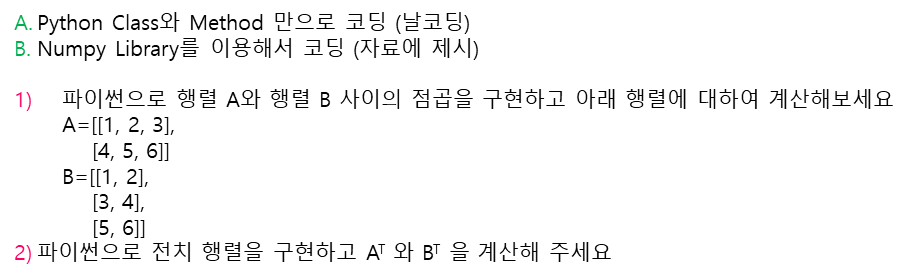

## 1) 행렬 점곱 그래프 (내적)
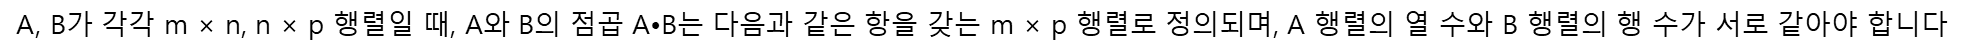
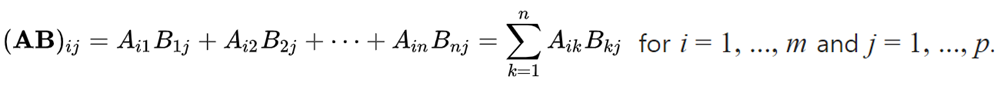

In [31]:
def my_matrix_dot(A, B):
    if shape(A)[1] != shape(B)[0]:
        raise ArithmeticError("cannot dot product matrices with different shapes")
        
    num_rows, num_cols = shape(A)[0], shape(B)[1]
    
    entry_fn = lambda i, j: dot(A[i], [x[j] for x in B])
    
    return make_matrix(num_rows, num_cols, entry_fn)

A = [[1, 2, 3],
    [4, 5, 6]]
B = [[1, 2],
    [3, 4],
    [5, 6]]


my_matrix_dot(A, B)

[[22, 28], [49, 64]]

In [32]:
# Numpy version
np.dot(A,B)

array([[22, 28],
       [49, 64]])

## 2) 전치 행렬                                                                                                                 

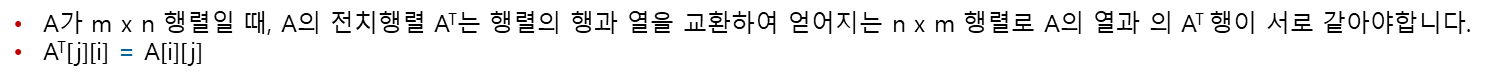

In [33]:
def my_matrix_transpose(M):
    num_cols, num_rows = shape(M)
    
    entry_fn = lambda i, j: M[j][i]
    
    return make_matrix(num_rows, num_cols, entry_fn)

A = [[6, 4, 24],
    [1, -9, 8]]
B = [[1, 2],
    [3, 4],
    [5, 6]]
my_matrix_transpose(A)

[[6, 1], [4, -9], [24, 8]]

In [34]:
# Numpy version
np.transpose(A) # vector와 마찬가지로 크기 같은 matrix 형태의 list가 돌아오면 자동으로 변환
np.transpose(B) # vector와 마찬가지로 크기 같은 matrix 형태의 list가 돌아오면 자동으로 변환

array([[ 6,  1],
       [ 4, -9],
       [24,  8]])

array([[1, 3, 5],
       [2, 4, 6]])